<a href="https://colab.research.google.com/github/BinaerBaer/Sandbox/blob/master/Codesnippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<a href="https://colab.research.google.com/github/BinaerBaer/Sandbox/blob/master/Codesnippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib global parameters

In [0]:
import matplotlib.pyplot as plt
# Plot formatting
# https://matplotlib.org/3.1.1/users/dflt_style_changes.html

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

plt.rcParams["patch.force_edgecolor"] = True

# Seaborn global parameters

In [0]:
# Get all matplotlib output in seaborn style: 
# https://seaborn.pydata.org/generated/seaborn.set.html

import seaborn as sns
# default seaborn style
sns.set()

# Notebook Style: higher fontsize
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Poster Style: Extra large fontsize, larger gridlinewidth
sns.set_context("poster")

# Seaborn Colorpalettes
# https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

# Classifier Evaluation

In [0]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

# Better confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Visualizing the F-beta-Score

In [0]:
import numpy as np

In [0]:
precision = np.linspace(0, 1, 100)
recall = np.linspace(0, 1, 100)
betas = [0.25, 0.5, 0.75, 1]
fscore = []
for i, beta in enumerate(betas):
    fscore.append(np.array([[((1+(beta*beta)) * ( pr * rec / ((beta*beta*(pr))+ rec))) for pr in precision]\
                   for rec in recall]))

/Users/bendixhass/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in double_scalars



In [0]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#fig = go.Figure(data=[go.Surface(z=fscore, x=precision, y=recall)])

fig = make_subplots(rows=2, cols=2,
    subplot_titles=("beta = .25", "beta = .5", "beta = .75", "beta = 1"))

fig.add_trace(go.Contour(z=fscore[0], x=precision, y=recall), row=1, col=1)
fig.add_trace(go.Contour(z=fscore[1], x=precision, y=recall), row=1, col=2)
fig.add_trace(go.Contour(z=fscore[2], x=precision, y=recall), row=2, col=1)
fig.add_trace(go.Contour(z=fscore[3], x=precision, y=recall), row=2, col=2)

fig.update_layout(title_text="F-beta-score", width=800, height=1000)
for row in range(1,3):
    for col in range(1,3):
        fig.update_xaxes(title_text="Precision", row=row, col=col)
        fig.update_yaxes(title_text="Recall", row=row, col=col)

fig.show()

# Bandwith plot

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


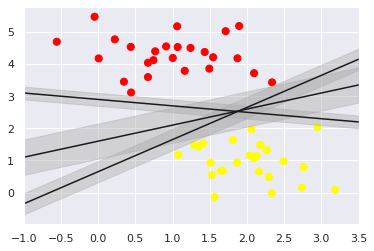

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);